In [83]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
%%sh
./run.sh

Experiment date and time: Wed Jun 14 12:12:15 PM PDT 2023
Number of Branches: 
44200573
Number of Mispredicted Indirect Branches: 
573723


In [85]:
def clean_df(df):
    df = df.fillna(-1)
    df = df.replace(r'[^0-9]+',-1)
    df = df.replace('',-1)
    df = df.replace(' ',-1)
    df = df.replace('\n',-1)
    return df

# reading and normalizing the data
data = pd.read_csv("results.csv", delim_whitespace=True)
data = clean_df(data)
data["BrIndir"] = pd.to_numeric(data["BrIndir"],errors='coerce')
data["BrMispInd"] = pd.to_numeric(data["BrMispInd"],errors='coerce')
data["BrIndir"] = data["BrIndir"] // 1000
data["BrMispInd"] = data["BrMispInd"] / 1000

df = pd.DataFrame(data)
condensed_df = df.groupby('BrIndir').mean().reset_index()

In [86]:
condensed_df

,BrIndir,Clock,BrRetired,BrMisAll,BrMispInd,BrMispCond
0,1,3395649.25,41000.65,998.00,0.00070,997.30
1,2,6849885.70,81000.90,1754.70,0.62120,1133.50
2,3,10749450.65,121001.25,2721.55,1.22780,1493.75
3,4,15907461.75,161001.85,3795.75,1.78685,2008.90
4,5,19871244.50,201002.30,6596.90,2.44075,4156.15
5,6,24094690.50,241002.75,6912.80,3.00820,3904.60
6,7,29250161.15,281003.25,8754.40,3.34670,5407.70
7,8,33589486.45,321003.70,8456.85,3.91755,4539.30
8,9,46376837.10,361005.80,13281.60,5.81490,7466.70
9,10,55739519.45,401006.20,13612.70,6.52150,7091.20


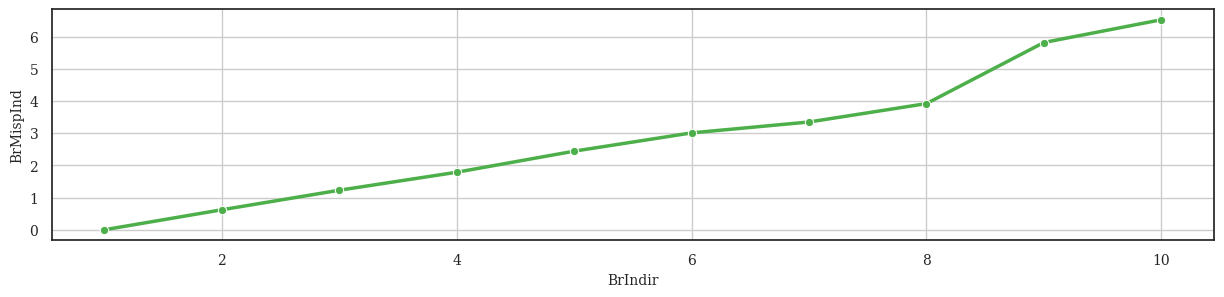

In [87]:

def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(15,3),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()
p = sns.lineplot(data=condensed_df, x="BrIndir", y="BrMispInd", marker="o", color=sns.color_palette("Set1")[2], linewidth=2.5, markersize = 6)
p.grid()
# p.set_xscale('log', base=2)
# p.set(xlim=(0,200))
# p.set(ylim=(0,15))

# Saving the Seaborn Figure:
# plt.savefig('res.pdf', bbox_inches='tight')